In [104]:
# TRIAL: time series analysis done without including COVID-19 data from 2020 and 2021, 
# to check if the model forecast appropriately the mong term trend
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [105]:
data = pd.read_excel('prova _1991_2019.xlsx')
data.shape

(348, 2)

In [106]:
data.head()

,YYYY-MM,Total passengers
0,1991-01,512773.632
1,1991-02,528797.808
2,1991-03,632954.952
3,1991-04,648979.128
4,1991-05,705063.744


In [107]:
data['YYYY-MM'] = pd.to_datetime(data['YYYY-MM'], infer_datetime_format=True)
data = data.set_index(['YYYY-MM'])
print(data.head())
print(data.tail())

            Total passengers
YYYY-MM                     
1991-01-01        512773.632
1991-02-01        528797.808
1991-03-01        632954.952
1991-04-01        648979.128
1991-05-01        705063.744
            Total passengers
YYYY-MM                     
2019-08-01         3180302.0
2019-09-01         3265081.0
2019-10-01         3232342.0
2019-11-01         2544174.0
2019-12-01         2605801.0


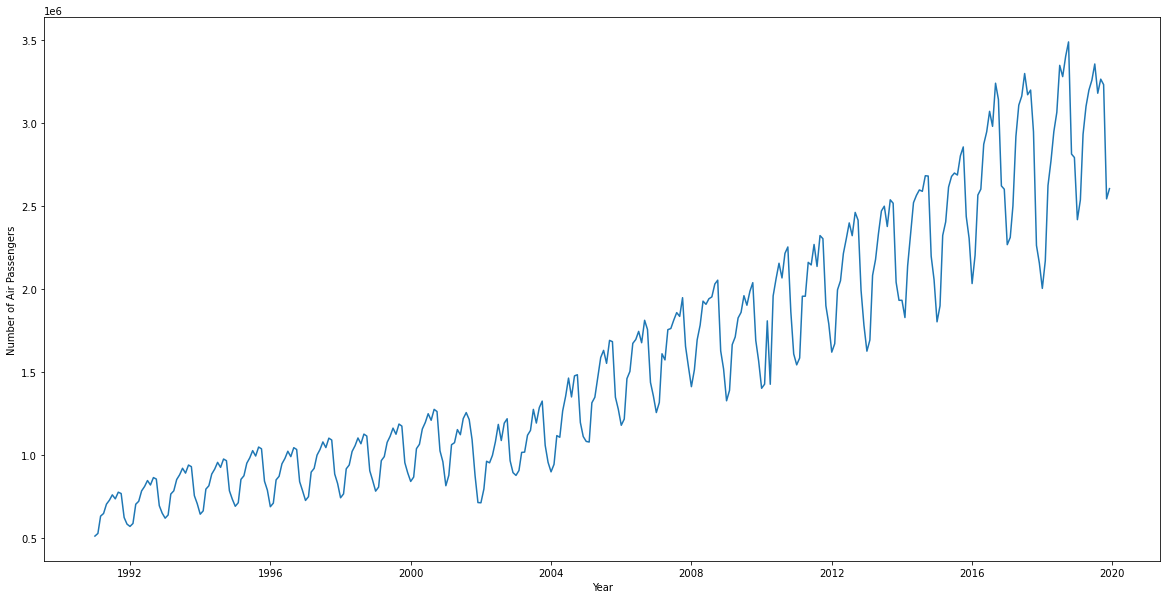

In [108]:
plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Number of Air Passengers")
plt.plot(data)
plt.show()

In [109]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Total passengers
YYYY-MM                     
1991-01-01               NaN
1991-02-01               NaN
1991-03-01               NaN
1991-04-01               NaN
1991-05-01               NaN
1991-06-01               NaN
1991-07-01               NaN
1991-08-01               NaN
1991-09-01               NaN
1991-10-01               NaN
1991-11-01               NaN
1991-12-01     667674.000000
1992-01-01     672518.506667
1992-02-01     677514.404167
1992-03-01     683494.342083
            Total passengers
YYYY-MM                     
1991-01-01               NaN
1991-02-01               NaN
1991-03-01               NaN
1991-04-01               NaN
1991-05-01               NaN
1991-06-01               NaN
1991-07-01               NaN
1991-08-01               NaN
1991-09-01               NaN
1991-10-01               NaN
1991-11-01               NaN
1991-12-01      92704.666631
1992-01-01      85079.463880
1992-02-01      77275.140503
1992-03-01      76283.615150


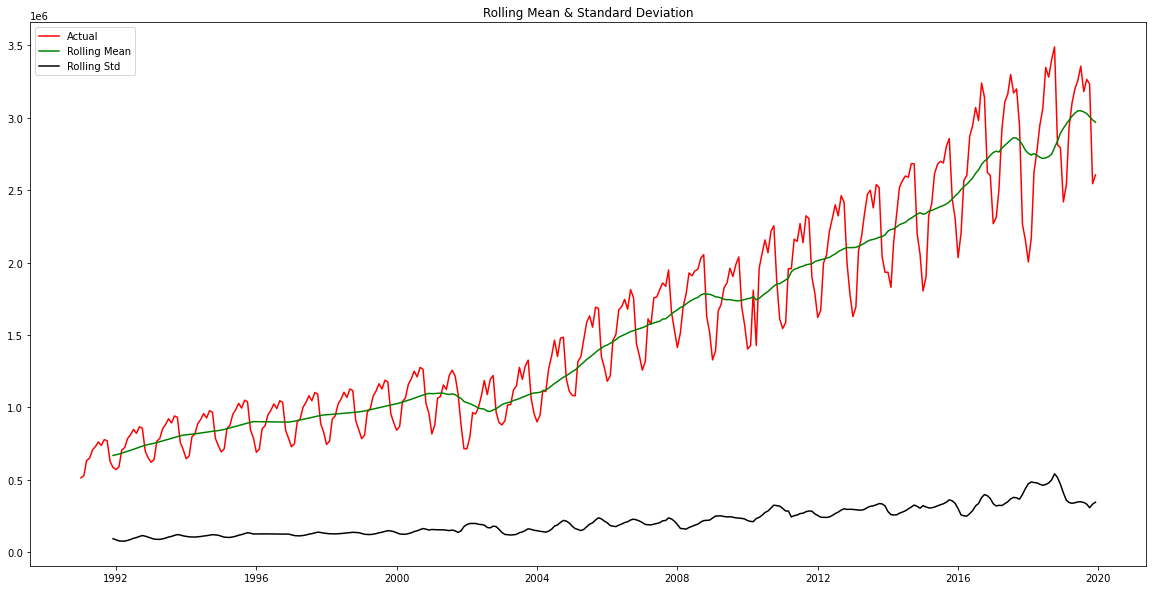

In [110]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [111]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Total passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.828988
p-value                   0.992090
Lags Used                12.000000
No. of Obs              335.000000
Critical Value (1%)      -3.450022
Critical Value (5%)      -2.870207
Critical Value (10%)     -2.571387
dtype: float64


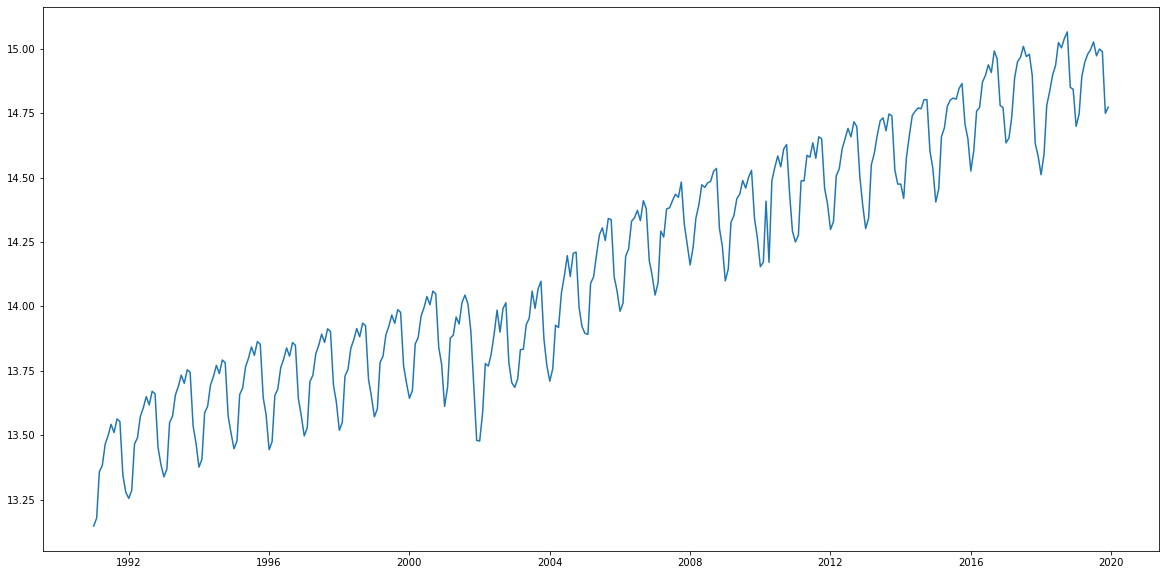

In [112]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)
plt.show()

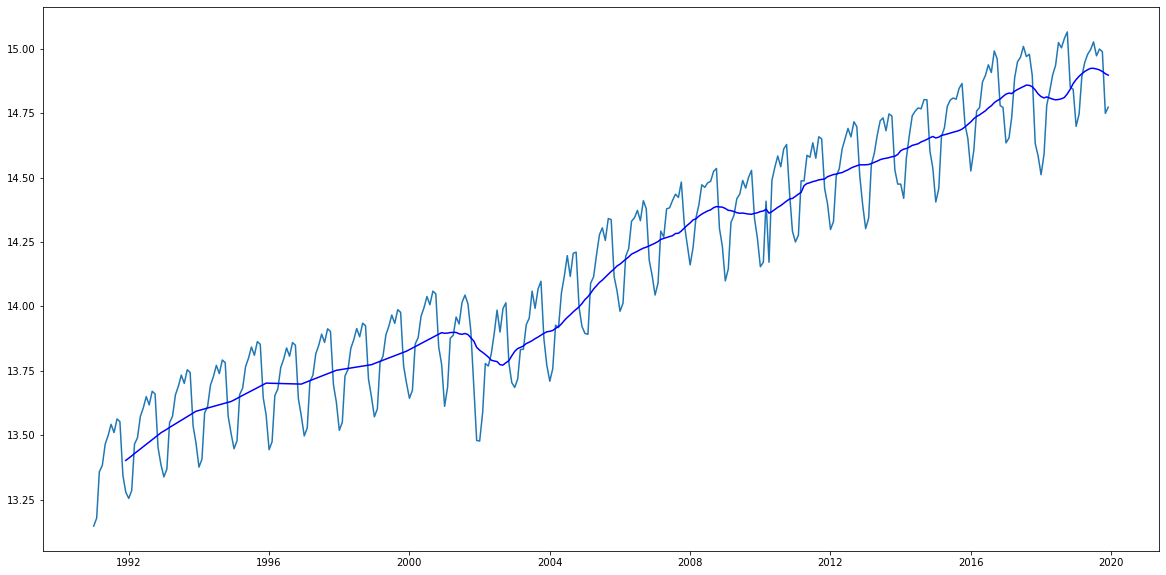

In [113]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')
plt.show()

In [114]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Total passengers
YYYY-MM,
1991-01-01,NaN
1991-02-01,NaN
1991-03-01,NaN
1991-04-01,NaN
1991-05-01,NaN
1991-06-01,NaN
1991-07-01,NaN
1991-08-01,NaN
1991-09-01,NaN


In [115]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Total passengers
YYYY-MM,
1991-12-01,-0.123084
1992-01-01,-0.156217
1992-02-01,-0.134395
1992-03-01,0.036449
1992-04-01,0.052501


In [116]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Total passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

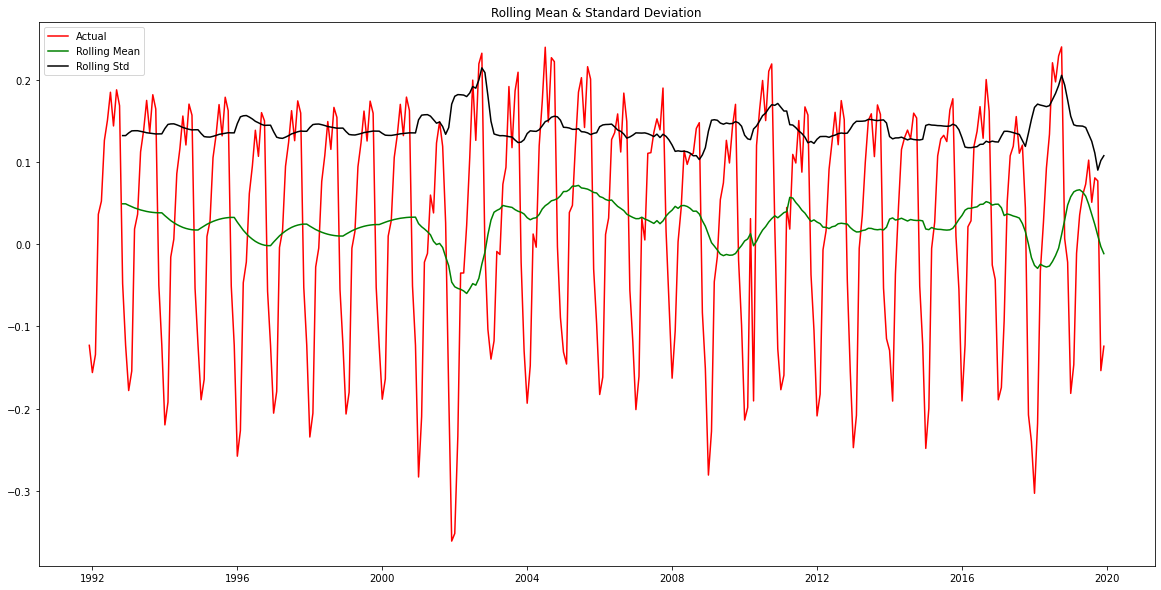

Dickey-Fuller Test: 
Test Statistic           -5.428926
p-value                   0.000003
Lags Used                14.000000
No. of Obs              322.000000
Critical Value (1%)      -3.450823
Critical Value (5%)      -2.870558
Critical Value (10%)     -2.571575
dtype: float64


In [117]:
stationarity(data_log_diff)

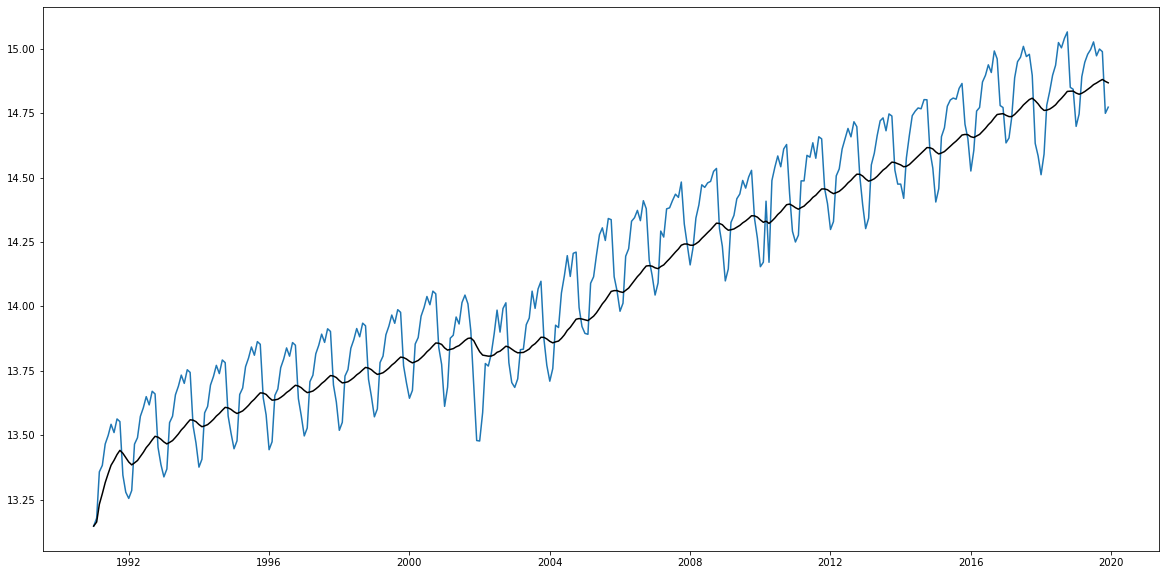

In [118]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')
plt.show()

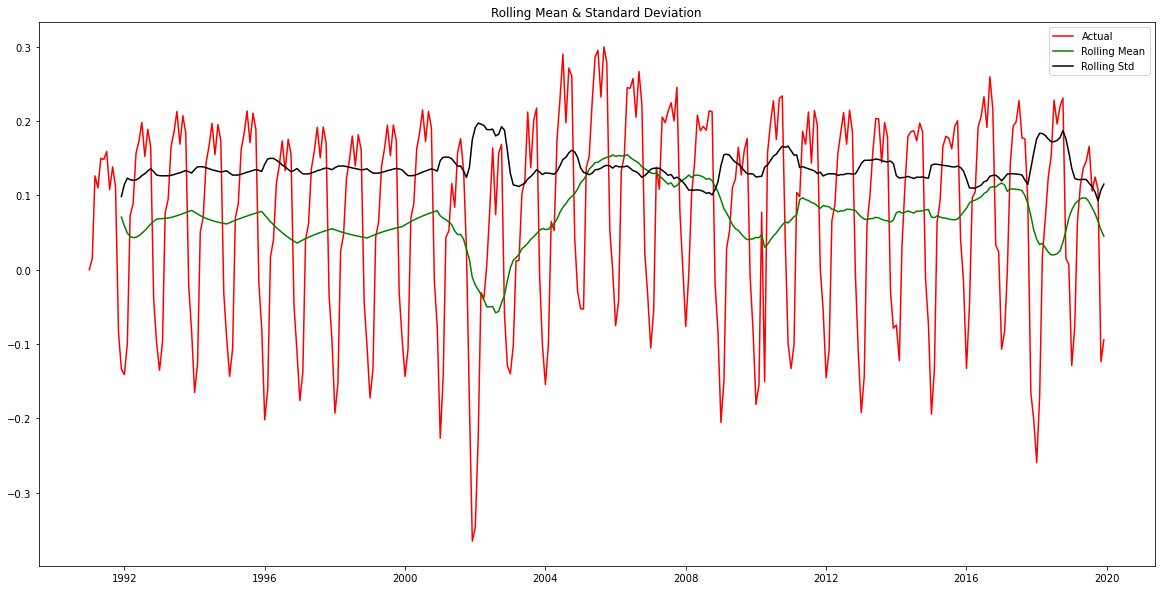

Dickey-Fuller Test: 
Test Statistic           -3.623978
p-value                   0.005319
Lags Used                14.000000
No. of Obs              333.000000
Critical Value (1%)      -3.450141
Critical Value (5%)      -2.870259
Critical Value (10%)     -2.571415
dtype: float64


In [119]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

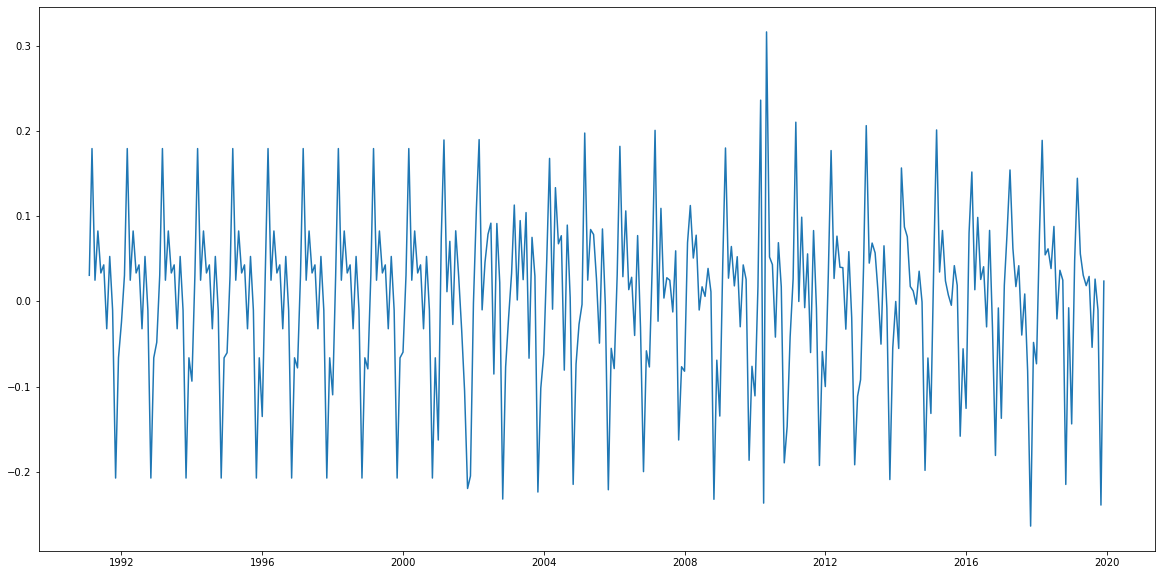

In [120]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)
plt.show()

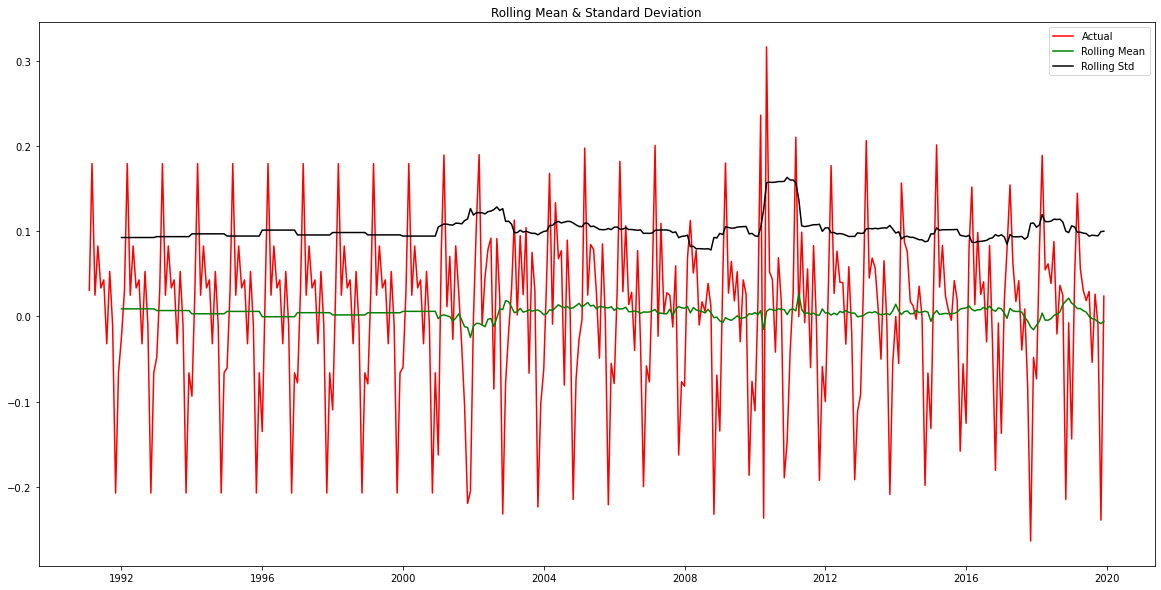

Dickey-Fuller Test: 
Test Statistic           -5.282148
p-value                   0.000006
Lags Used                12.000000
No. of Obs              334.000000
Critical Value (1%)      -3.450081
Critical Value (5%)      -2.870233
Critical Value (10%)     -2.571401
dtype: float64


In [121]:
data_shift=data_shift.dropna()
stationarity(data_shift)

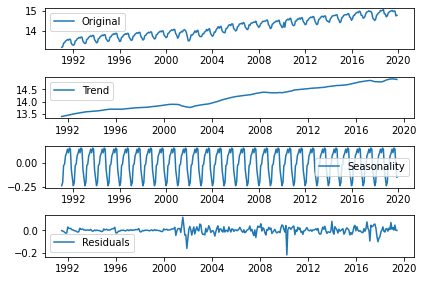

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

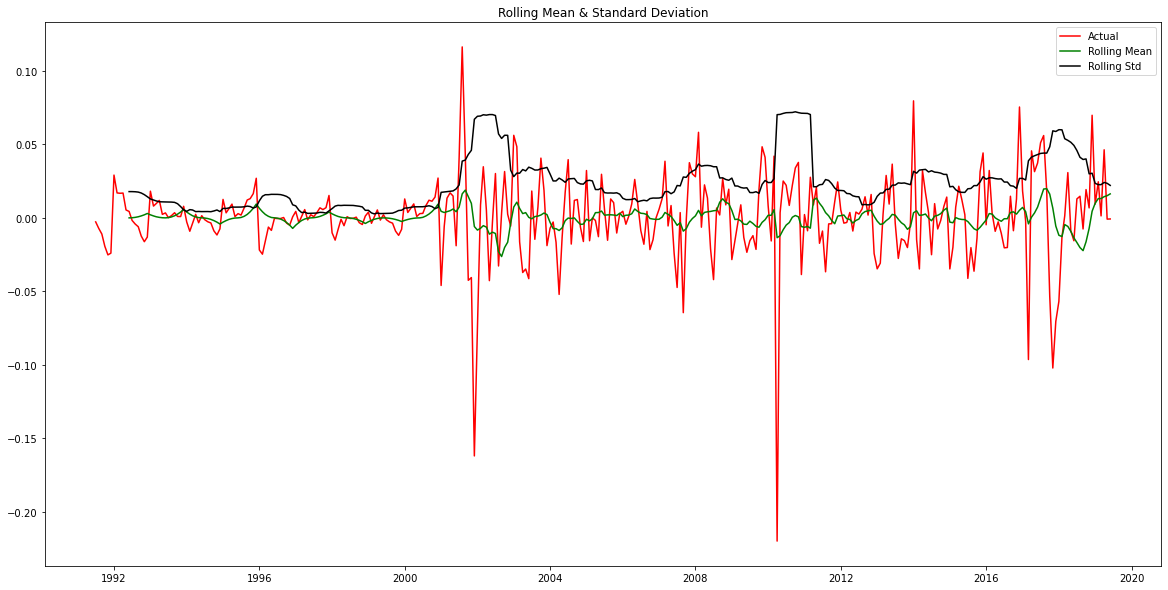

Dickey-Fuller Test: 


KeyError: 'Total passengers'

In [123]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

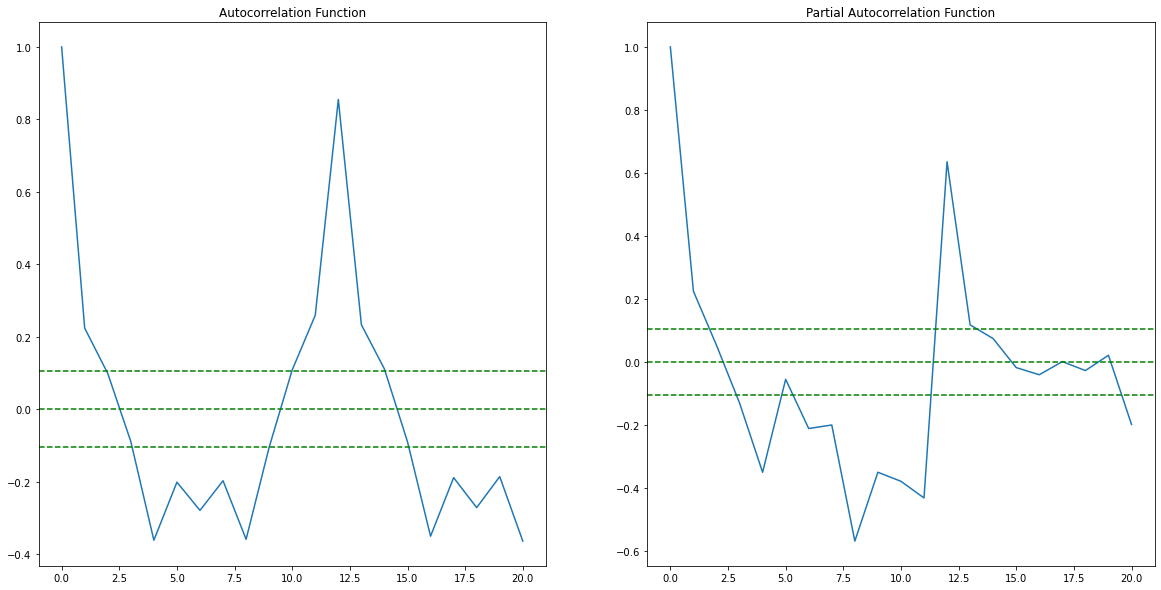

In [124]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.show()

plotting ARIMA model


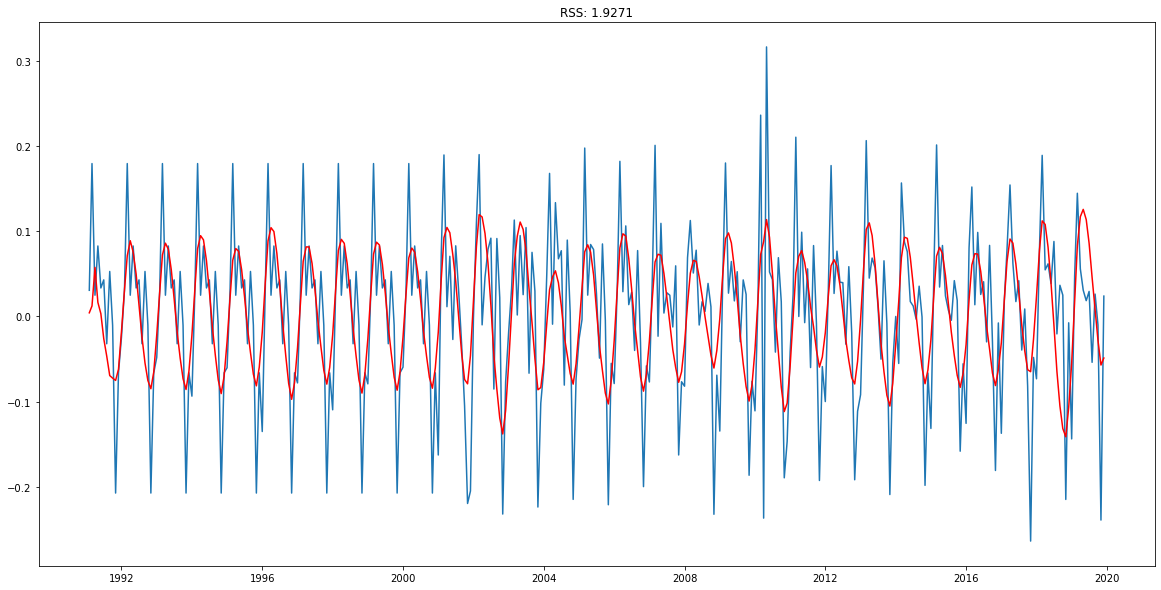

In [125]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Total passengers'])**2))
print('plotting ARIMA model')

In [126]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

YYYY-MM
1991-02-01    0.004299
1991-03-01    0.012382
1991-04-01    0.057666
1991-05-01    0.016557
1991-06-01    0.003233
dtype: float64


In [127]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

YYYY-MM
1991-02-01    0.004299
1991-03-01    0.016681
1991-04-01    0.074347
1991-05-01    0.090904
1991-06-01    0.094138
dtype: float64


In [128]:
predictions_log=pd.Series(data_log['Total passengers'][0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

YYYY-MM
1991-01-01    13.147590
1991-02-01    13.151889
1991-03-01    13.164271
1991-04-01    13.221937
1991-05-01    13.238494
dtype: float64

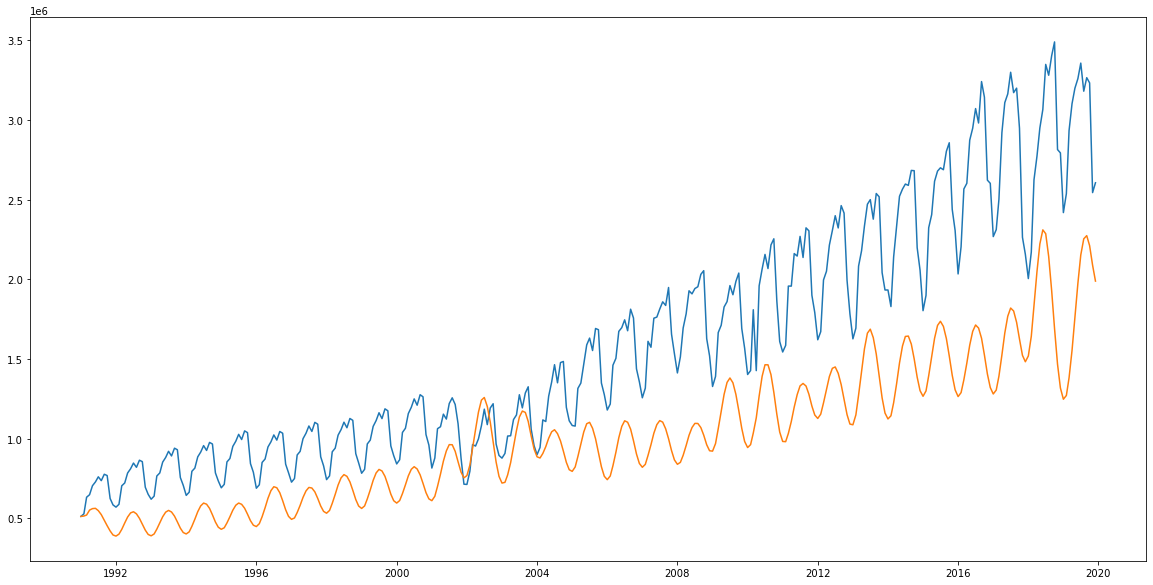

In [129]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.show()

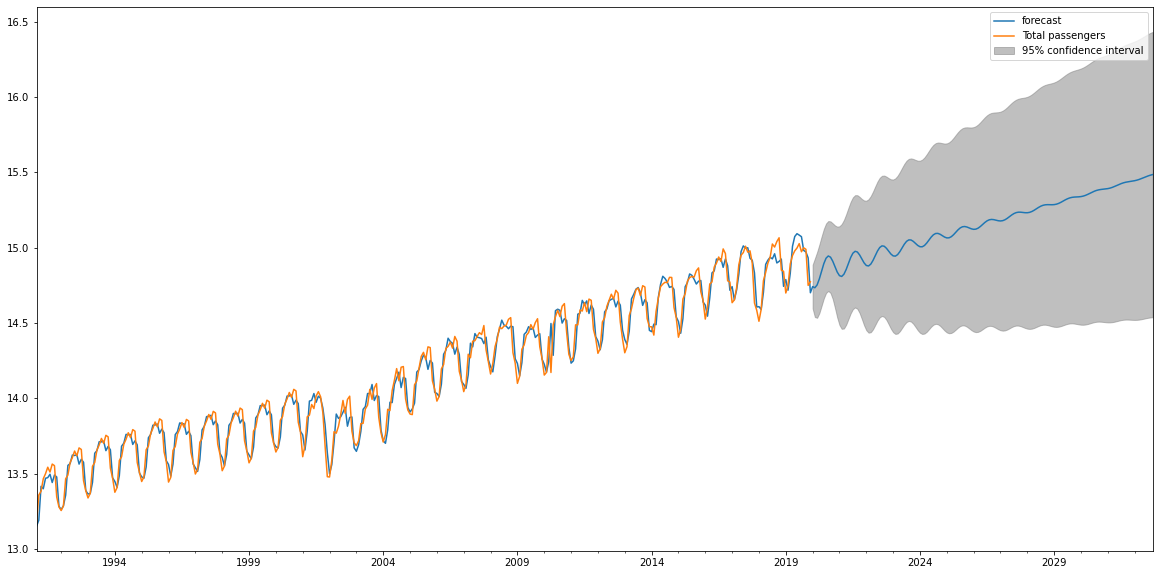

In [130]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,500)
x=results.forecast(steps=12)

In [131]:
print(x)

(array([14.74120588, 14.73350431, 14.75220849, 14.79238059, 14.84368422,
       14.89332791, 14.9295207 , 14.94451293, 14.9364451 , 14.9095737 ,
       14.8728868 , 14.83754286]), array([0.0740814 , 0.09911377, 0.11128425, 0.11597633, 0.11718909,
       0.11740623, 0.11755332, 0.1182696 , 0.12114946, 0.12819746,
       0.13980758, 0.15388182]), array([[14.596009  , 14.88640276],
       [14.53924489, 14.92776372],
       [14.53409537, 14.97032161],
       [14.56507116, 15.01969003],
       [14.61399782, 15.07337061],
       [14.66321592, 15.1234399 ],
       [14.69912043, 15.15992097],
       [14.71270877, 15.17631709],
       [14.69899651, 15.17389369],
       [14.6583113 , 15.1608361 ],
       [14.59886898, 15.14690462],
       [14.53594004, 15.13914569]]))


In [132]:
np.exp(x[0])

array([2523622.37489913, 2504261.16675802, 2551542.12913227,
       2656129.61801645, 2795954.80285363, 2938259.36451074,
       3046551.02802449, 3092569.71959424, 3067719.77855173,
       2986383.56769363, 2878807.77576417, 2778836.47030678])